# Lab 5: Structural Representations

## Constraint Satisfaction Problem, Scheduling
CSPs are defined by 3 finite sets:

- Variables: ($x_1$ $x_2$, ... $x_n$)
- Domain: set of possible values for each variable.
- Constraints: ($c_1$ $c_2$, ... $c_m$)
    - Requirements between variables that needs to be true. 
    - Constraints usually are unary (restrict single variable) or binary (requirements on two variables). Restrictions between more variables can be reformulated as binary.

# Formulating problems as CSP

### 1. Australia map painting

![]( 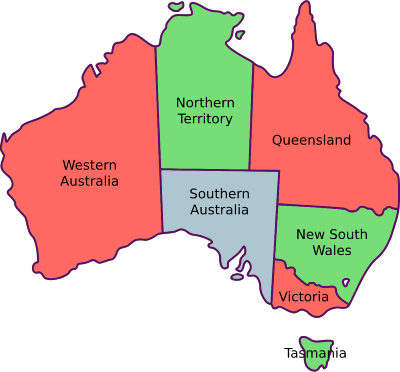)

- Classical CSP example. 

- The task is to color territories in a map of Australia with three colors (red, green, blue). But, no neighbouring territories should have the same color.

**Question:** What are the variables? What are the domains? How would you set the constraints?



## Backtracking
<div>
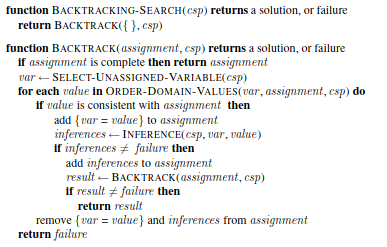
</div>


### Task:

**Question:** What does the amount of searched assignments depend on within the algorithm?


**Question:** How would the backtracking algorithm work in the Australia Map example?



**Question:** How can we represent CSP problem in python?



In [1]:
# Based on https://github.com/davecom/ClassicComputerScienceProblemsInPython/tree/master/Chapter3

from __future__ import annotations
import copy
import numpy as np
import matplotlib.pyplot as plt
from typing import TypeVar, Dict, List, Optional, Tuple
from dataclasses import dataclass

V = TypeVar('V') # variable type
D = TypeVar('D') # domain type


@dataclass
class CSPProblem:
    '''
    Dataclass for storing problem instance.
    '''
    variables: list
    domains: dict
    constraints: list

class Constraint():
    '''
    Base class for constraints.
    '''
    def __init__(self, variables: List[V]) -> None:
        self.variables = variables

    def __repr__(self) -> str:
        return "-".join([str(i) for i in self.variables])

    def __eq__(self, other: Constraint) -> bool:
        return self.variables == other.variables
    
    def __hash__(self) -> int:
        return hash(tuple(self.variables))

    def satisfied(self, assignment: Dict[V, D]) -> bool:
        ...

class BasicCSP():
    '''
    CSP Solver using backtracking algorithm.
    '''
    def __init__(self,
                 variables: List[V],
                 domains: Dict[V, List[D]],
                 constraints: List[Constraint] = []) -> None:

        self.variables = variables
        self.domains = copy.deepcopy(domains)
        self.constraints = {}
        
        self.steps = 0
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")
        
        # Add constraints if any
        for c in constraints:
            self.add_constraint(c)

    def add_constraint(self, constraint: Constraint) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)

    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True

    def select_variable(self, array: List[V]) -> V:
        return array[0] # Select first
    
    def sorted_values(self, var: V, assignment: Dict[V, D]) -> List[D]:
        return self.domains[var] # No ordering
 
 
    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # Assignment is a dictionary with variable as a key and variable value as value 
        if len(assignment) == len(self.variables):
            return assignment

        unassigned = [v for v in self.variables if v not in assignment]
        var = self.select_variable(unassigned)
        values = self.sorted_values(var, assignment)

        for value in values:
            self.steps += 1
            local_assignment = assignment.copy()
            local_assignment[var] = value

            if self.consistent(var, local_assignment):
                result = self.backtracking_search(local_assignment)
                if result is not None:
                    return result
        return None 


### Australia map constraint

For each pair of neighboring states you create a single constraint that validates, whether they have the same color.

In [2]:
class InequalityConstraint(Constraint):
    def __init__(self, var1, var2) -> None:
        super().__init__([var1, var2])
        self.var1 = var1
        self.var2 = var2 
 
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        # Assignment is a dictionary with variable as a key and variable value as value 
        # If one of the variables is not in the assignment then the constraint is satisfied, otherwise we compare the colors of those assignments.
        if self.var1 not in assignment or self.var2 not in assignment:
            return True
        return assignment[self.var1] != assignment[self.var2] 

### Australia map - CSP Formulation

Now we initialize each variables, their domains and constraints. Let us try several different variable orderings with our default solver.

In [3]:
# Initialize variables
variables = [
    "Victoria",  "Western Australia", "Queensland", "New South Wales", "Northern Territory",
    "Tasmania", "South Australia"]

# What happen if you change the order?
# variables = [
#     "Victoria", "Northern Territory", "Western Australia", "Queensland", "New South Wales",
#     "Tasmania", "South Australia"]


# Initialize domains
domains = {v: ["red", "green", "blue"] for v in variables}

# Initialize constraints
constraints = [
    InequalityConstraint("Western Australia", "Northern Territory"),
    InequalityConstraint("Western Australia", "South Australia"),
    InequalityConstraint("South Australia", "Northern Territory"),
    InequalityConstraint("Queensland", "Northern Territory"),
    InequalityConstraint("Queensland", "South Australia"),
    InequalityConstraint("Queensland", "New South Wales"),
    InequalityConstraint("New South Wales", "South Australia"),
    InequalityConstraint("Victoria", "South Australia"),
    InequalityConstraint("Victoria", "New South Wales"),
    InequalityConstraint("Victoria", "Tasmania"),
]
australia = CSPProblem(variables, domains, constraints)

print('Australia map coloring')
csp = BasicCSP(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(solution)
print(f'Backtracking steps: {csp.steps}')

Australia map coloring
{'Victoria': 'red', 'Western Australia': 'red', 'Queensland': 'red', 'New South Wales': 'green', 'Northern Territory': 'green', 'Tasmania': 'green', 'South Australia': 'blue'}
Backtracking steps: 12


In [4]:
variables = [
    "Victoria", "Northern Territory", "Western Australia", "Queensland", "New South Wales",
    "Tasmania", "South Australia"]

australia = CSPProblem(variables, domains, constraints)

print('Australia map coloring')
csp = BasicCSP(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(solution)
print(f'Backtracking steps: {csp.steps}')

Australia map coloring
{'Victoria': 'red', 'Northern Territory': 'green', 'Western Australia': 'red', 'Queensland': 'red', 'New South Wales': 'green', 'Tasmania': 'green', 'South Australia': 'blue'}
Backtracking steps: 69


In [5]:
import random
random.shuffle(variables) 

australia = CSPProblem(variables, domains, constraints)

print('Australia map coloring')
csp = BasicCSP(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(solution)
print(f'Backtracking steps: {csp.steps}')

Australia map coloring
{'Western Australia': 'red', 'Queensland': 'red', 'South Australia': 'green', 'Victoria': 'red', 'Northern Territory': 'blue', 'New South Wales': 'blue', 'Tasmania': 'green'}
Backtracking steps: 13


### 2. University schedule


Scheduling is a well studied problem that occurs in many different fields in real life, for example: Airline flight assignments, sport tournaments, production managment, hospital shifts or college schedules. The challenge lies in balancing multiple constraints, such as limited resources, time restrictions or personal preferences. CSP is often used as a model to those scheduling problems.

Consider a simplified situation at our university. You are creating schedule for following subjects: Intorduction to Artificial Intelligence (ZUI), Parallel and Distributed computing (PDV), Functional Programming (FUP), Optimization (OPT), Linear Algebra (LAG). FUP and OPT have a single lecture and a single lab. ZUI have a single lecture, but two labs. LAG has only a lecture, while PDV only has a lab. You also have 2 rooms available (307, 310) with time-slots 9:15, 11:00, 12:45, 14:30, 16:15. There are 3 total tutors at the department. 

To reitrate:

- Subjects: FUP lecture, FUP lab, OPT lecture, OPT lab, ZUI lecture, ZUI lab1, ZUI lab2, LAG lecture, PDV lab.

- Rooms: 307, 310

- Time: 9:15, 11:00, 12:45, 14:30, 16:15

- Tutors: $T_1, T_2, T_3$


What would be the Variables and domains for CSP that models this situation? Are there any alternatives?


Can you estimate the size of the search tree?



In [6]:
from itertools import product # Cartesian product

lectures = ["FUP-Lecture", "FUP-Lab", "OPT-Lecture", "OPT-Lab", "ZUI-Lecture", "ZUI-Lab1", "ZUI-Lab2", "LAG-Lecture", "PDV-Lab"]
rooms = [307, 310]
time_slots = [0, 1, 2, 3, 4] # 0 - 9:15 time, 1 - 11:00 time, 2 - 12:45 time, 3 - 14:30 time, 4 - 16:15 time
tutors = ["T1", "T2", "T3"]

domains_lectures = {v: list(product(time_slots, rooms, tutors)) for v in variables}


class TimeConsistencyConstraint(Constraint):
    def __init__(self, lectures: List[str]) -> None:
        super().__init__(lectures)
        self.lectures = lectures
    
    def satisfied(self, assignment: Dict[str, Tuple[int, int, str]]) -> bool:
        # Check if there are two lectures in the same room at the same time or held by the same tutor at the same time.
        for l1, (room1, time1, tutor1) in assignment.items():
            for l2, (room2, time2, tutor2) in assignment.items():
                if l1 == l2:
                    continue
                if room1 == room2 and time1 == time2:
                    return False
                if tutor1 == tutor2 and time1 == time2:
                    return False 
                  
        return True
       

def plot_schedule(solution: List[str, int, int, str]):
    fig, ax = plt.subplots()
    # corresponding_times = [(0, 90), (105, 195), (210, 300), (315, 405), (420, 510)]
    for lecture, room, time_slot, tutor in solution: 
      
        start_time = time_slot * 105
        room_id = rooms.index(room)
        ax.barh(room_id, width = 90, left=start_time)
        ax.text(start_time, room_id, lecture + " " + tutor)
    ax.set_xticks(np.arange(len(time_slots)) * 105)
    ax.set_yticks(np.arange(len(rooms)))
    ax.set_xticklabels(time_slots)
    ax.set_yticklabels(rooms)
    fig.set_figwidth(10)


In [7]:
!pip install matplotlib

Backtracking steps: 121


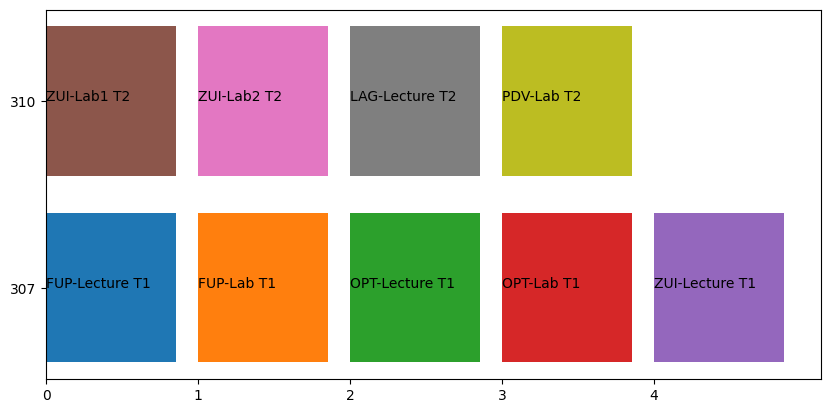

In [8]:
variables = lectures
domains_lectures = {v: list(product(rooms, time_slots, tutors)) for v in variables}
constraints = [TimeConsistencyConstraint(variables)]


schedule_lectures = CSPProblem(variables, domains_lectures, constraints)

csp = BasicCSP(schedule_lectures.variables, schedule_lectures.domains, schedule_lectures.constraints)
solution = csp.backtracking_search()

print(f'Backtracking steps: {csp.steps}')

room_assignments = []
for lecture, (room, time_slot, tutor) in solution.items():
  room_assignments.append((lecture, room, time_slot, tutor))


plot_schedule(room_assignments)

### More constraints

This is trivial. But what if there are additional constraints in the problem, like some tutors cannot teach some lectures, or that no two lectures can be held at the same time. 


**Questions:** Is it easier to find the solution in this more restricted problem or is it more difficult?


Can you think of more possible constraints in this problem?

['FUP-Lecture', 'OPT-Lecture', 'ZUI-Lecture', 'LAG-Lecture']
Backtracking steps: 187


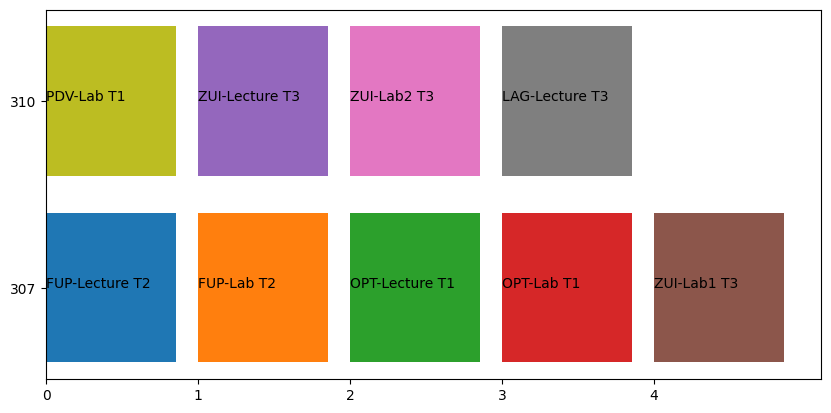

In [9]:
class LectureTimeInequalityConstraint(Constraint):
    def __init__(self, lecture1:str, lecture2:str) -> None:
        super().__init__([lecture1, lecture2])
        self.lecture1 = lecture1
        self.lecture2 = lecture2
    
    def satisfied(self, assignment: Dict[str, Tuple[int, int, str]]) -> bool:
        # Check if two lectures are not held at the same time
        if self.lecture1 not in assignment or self.lecture2 not in assignment:
          return True
        return assignment[self.lecture1][1] != assignment[self.lecture2][1] # assignment values are (room, time, tutor)
      
class LectureTutorConstraint(Constraint):
    def __init__(self, lecture:str, tutor:str) -> None:
        super().__init__([lecture,]) # Why is there only lecture in the list?
        self.lecture = lecture
        self.tutor = tutor 
    
    def satisfied(self, assignment: Dict[str, Tuple[int, int, str]]) -> bool:
        # Check if given lecture is held by the given tutor
        if self.lecture not in assignment:
          return True
        return assignment[self.lecture][2] != self.tutor

class LecturePrecenditionConstraint(Constraint):
    def __init__(self, lecture1:str, lecture2:str) -> None:
        super().__init__([lecture1, lecture2])
        self.lecture1 = lecture1
        self.lecture2 = lecture2
    
    def satisfied(self, assignment: Dict[str, Tuple[int, int, str]]) -> bool:
        # Check if lecture1 happens before lecture2
        if self.lecture1 not in assignment or self.lecture2 not in assignment:
          return True
        return assignment[self.lecture1][1] < assignment[self.lecture2][1]
  
class SameTutorConstraint(Constraint):
    def __init__(self, lecture1:str, lecture2:str) -> None:
        super().__init__([lecture1, lecture2])
        self.lecture1 = lecture1
        self.lecture2 = lecture2
    
    def satisfied(self, assignment: Dict[str, Tuple[int, int, str]]) -> bool:
        # Check if two lectures are held by the same tutor
        if self.lecture1 not in assignment or self.lecture2 not in assignment:
          return True
        return assignment[self.lecture1][2] == assignment[self.lecture2][2]
  
variables = lectures
domains_lectures = {v: list(product(rooms, time_slots, tutors)) for v in variables}
constraints = [TimeConsistencyConstraint(variables)]

lecture_subset = list(filter(lambda x: "Lecture" in x, lectures))
print(lecture_subset)

for l1 in lecture_subset:
  for l2 in lecture_subset:
    if l1 == l2:
      continue
    constraints.append(LectureTimeInequalityConstraint(l1, l2)) 
    
constraints.append(LecturePrecenditionConstraint("FUP-Lecture", "FUP-Lab"))
constraints.append(LecturePrecenditionConstraint("OPT-Lecture", "OPT-Lab"))
constraints.append(LecturePrecenditionConstraint("ZUI-Lecture", "ZUI-Lab1"))
constraints.append(LecturePrecenditionConstraint("ZUI-Lecture", "ZUI-Lab2"))
constraints.append(SameTutorConstraint("FUP-Lecture", "FUP-Lab"))
constraints.append(SameTutorConstraint("OPT-Lecture", "OPT-Lab"))
constraints.append(SameTutorConstraint("ZUI-Lecture", "ZUI-Lab1"))
constraints.append(SameTutorConstraint("ZUI-Lecture", "ZUI-Lab2"))
constraints.append(LectureTutorConstraint("FUP-Lecture", "T1"))
constraints.append(LectureTutorConstraint("LAG-Lecture", "T2"))
constraints.append(LectureTutorConstraint("ZUI-Lecture", "T1"))
constraints.append(LectureTutorConstraint("OPT-Lecture", "T3"))

schedule_lectures = CSPProblem(variables, domains_lectures, constraints)

csp = BasicCSP(schedule_lectures.variables, schedule_lectures.domains, schedule_lectures.constraints)
solution = csp.backtracking_search()

print(f'Backtracking steps: {csp.steps}') 
room_assignments = []
for lecture, (room, time_slot, tutor) in solution.items():
  room_assignments.append((lecture, room, time_slot, tutor))


plot_schedule(room_assignments)


## Heuristics

### Minimal remaining value heuristic
- Choose to expand the variable with the fewest possible values.

In [10]:
class CSP_MRV(BasicCSP):
    def select_variable(self, array: List[V]) -> V:
        return min(array, key=lambda var: len(self.domains[var]))

In [11]:

csp = CSP_MRV(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(solution)

{'Western Australia': 'red', 'Queensland': 'red', 'South Australia': 'green', 'Victoria': 'red', 'Northern Territory': 'blue', 'New South Wales': 'blue', 'Tasmania': 'green'}


### Least Constraining Value Heuristic
- Prefer assignment with values with fewest conflicts.

In [12]:
class CSP_LCV(CSP_MRV):
    '''
    Least Constraining Value + Minimal Remaining Value heuristics
    '''
    def sorted_values(self, var: V, assignment: Dict[V, D]) -> List[D]:
        values = self.domains[var]
        sorted_values = sorted(values, key=lambda value: self.count_conflicts(value, var, assignment))
        return sorted_values

    def count_conflicts(self, value: D, var: V, assignment: Dict[V, D]) -> int:
        local_assignment = assignment.copy()
        local_assignment[var] = value

        conflicts = 0
        for constraint in self.constraints[var]:
            if not constraint.satisfied(local_assignment):
                conflicts += 1
        return conflicts

In [13]:
print('Australia map coloring')
csp = BasicCSP(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(f'Basic steps:   {csp.steps}')

csp = CSP_MRV(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(f'MRV steps:     {csp.steps}')

csp = CSP_LCV(australia.variables, australia.domains, australia.constraints)
solution = csp.backtracking_search()
print(f'MRV+LCV steps: {csp.steps}')

Australia map coloring
Basic steps:   13
MRV steps:     13
MRV+LCV steps: 7


In [14]:
print('Scheduling with lectures as variables')
csp = BasicCSP(schedule_lectures.variables, schedule_lectures.domains, schedule_lectures.constraints)
solution = csp.backtracking_search()
print(f'Basic steps:   {csp.steps}')

csp = CSP_MRV(schedule_lectures.variables, schedule_lectures.domains, schedule_lectures.constraints)
solution = csp.backtracking_search()
print(f'MRV steps:     {csp.steps}')

csp = CSP_LCV(schedule_lectures.variables, schedule_lectures.domains, schedule_lectures.constraints)
solution = csp.backtracking_search()
print(f'MRV+LCV steps: {csp.steps}')

Scheduling with lectures as variables
Basic steps:   187
MRV steps:     187
MRV+LCV steps: 71


# STRIPS Planning

Stanford Research Institute Problem Solver

Problem in STRIPS is represented as quadruple $(P,I,G,A)$:
- $P$ stands for a finite set of atoms (boolean vars)
- $I\subseteq P$ stands for initial situation
- $G\subseteq P$ stands for goal situation
- $A$ is a finite set of actions a specified via $pre(a)$, $add(a)$, and $del(a)$, all subsets of $P$


- State is represented by the set of atoms that are true in it
- An action $a$ is applicable in a state $s$ iff $pre(a) \subseteq s$
- Applying an applicable action $a$ at s results in $s' = (s \setminus del(a)) \cup add(a)$


## Implementation
We will use PyDDL library to solve the STRIPS instances. It uses similar concepts as PDDL planning language, where planning task are separated into two components:

1. Domain - list of possible actions
2. Problem - domain, dictionary of all objects, initial state, goal state

#### Action
- Operator schemas with parameters. In order to be used in STRIPS like planning, they should be grounded/instantiated during execution.

- Action operator consists of:
    - List of parameters
    - List of preconditions($pre(a)$)
    - List of effects: delete effects ($del(a)$) and add effects ($add(a)$)
    - Delete effects ($del(a)$) are implemented by neg() method.

In [28]:
import sys
sys.path.append('/Users/frantiseksuran/Documents/IES/Summer semester II/FEL/FELINTROAI/my_venv/src/pyddl')

from pyddl import Domain, Problem, Action, State, neg, planner


In [ ]:
#!pip install --use-pep517 -e git+https://github.com/garydoranjr/pyddl.git#egg=pyddl
#import sys
#sys.path.append('src/pyddl')

#from pyddl import Domain, Problem, Action, State, neg, planner
#import numpy as np

Obtaining pyddl from git+https://github.com/garydoranjr/pyddl.git#egg=pyddl
  Updating ./my_venv/src/pyddl clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 0e3e48391b174396860f03800aefbdc683b96b6d
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pyddl (pyproject.toml) ... done
  Created wheel for pyddl: filename=pyddl-1.0-0.editable-py3-none-any.whl size=3646 sha256=dff4eea25130534ae9ac9a26fac4528a4e4fff1659dc64a2aae1fb1ed0d2e7dd
  Stored in directory: /private/var/folders/84/tld8_1sj16n1hlrg5md3jsdr0000gn/T/pip-ephem-wheel-cache-kgbhbcxp/wheels/50/f8/f7/aa1af0b72c816be8264a7cf26b0b8c464b4ac344f78a3b0bde
Successfully built pyddl
  Attempting uninstall: pyddl
    Found existing installation: pyddl 1.0
    Uninstalling pyddl-1.0:
      Successfully uninstalled pyddl-1.0


ModuleNotFoundError: No module named 'pyddl'

# Block world

We will use BlockWorld which should be familiar from the 1st homework assignment.

We will define these atoms:
  - Is hand empty ?

  - For each block:

    - Is it on the table?

    - Is it on top of the stack ?

    - Is the block in the hand ?

  - For each pair of blocks:

    - Is block 1 on top of block 2?

Can you estimate amount of atoms for $N$ blocks?


How would you define actions to pickup the block and put down the block?

In [29]:
def visualise_blockworld(world, n=4):
    data = np.full([n, n], " ")
    filled_row = 0

    for pred, *vals in world:
        if pred == 'holds':
            print(f'Hand: {1}')
        if pred == 'handempty':
            print("Hand: ' '")
        if pred == 'on_table':
            data[0][filled_row] = vals[0]
            filled_row += 1

    for pred, *vals in world:
        if pred == 'on':
            x, y = np.where(data==vals[1])
            data[x+1, y] = vals[0]
    data = np.flip(data, axis=0)
    for i in data:
        print(i)

        
objects = {'block': ('A', 'B', 'C', 'D')}

pickup = Action(
    'pickup',
    parameters=[
        ('block', 'x'),
    ],
    preconditions=[
        ('clear', 'x'),
        ('on_table', 'x'),
        ('handempty', ),
    ],
    effects=[
        # Add effects
        ('holds', 'x'),

        # Delete effects
        neg(('clear', 'x')),
        neg(('on_table', 'x')),
        neg(('handempty', )),
    ])
 
putdown = Action(
    'putdown',
    parameters=[
        ('block', 'x'),
    ],
    preconditions=[
        ('holds', 'x'),
    ],
    effects=[
        # Add effects
        ('clear', 'x'),
        ('on_table', 'x'),
        ('handempty', ),

        # Delete effects
        neg(('holds', 'x')),
    ]) 

stack = Action(
    'stack',
    parameters=[
        ('block', 'x'),
        ('block', 'y'),
    ],
    preconditions=[
        ('holds', 'x'),
        ('clear', 'y'),
    ],
    effects=[
        # Add effects
        ('clear', 'x'),
        ('on', 'x', 'y'),
        ('handempty', ),

        # Delete effects
        neg(('holds', 'x')),
        neg(('clear', 'y')),
    ]) 
 
unstack = Action(
    'unstack',
    parameters=[
        ('block', 'x'),
        ('block', 'y'),
    ],
    preconditions=[
        ('clear', 'x'),
        ('on', 'x', 'y'),
        ('handempty', ),
    ],
    effects=[
        # Add effects
        ('holds', 'x'),
        ('clear', 'y'),

        # Delete effects
        neg(('clear', 'x')),
        neg(('on', 'x', 'y')),
        neg(('handempty', )),
    ]) 

init = [
    ('on_table', 'A'),
    ('on_table', 'B'),
    ('on', 'D', 'A'),
    ('on', 'C', 'D'),
    ('clear', 'C'),
    ('clear', 'B'),
    ('handempty', ),
]

goal = [
    ('on_table', 'B'),
    ('on_table', 'C'),
    ('on', 'D', 'B'),
    ('on', 'A', 'D'),
    ('clear', 'A'),
    ('clear', 'C'),
    ('handempty', ),
]

domain = Domain((stack, unstack, pickup, putdown))

In [30]:
visualise_blockworld(init)

Hand: ' '
[' ' ' ' ' ' ' ']
['C' ' ' ' ' ' ']
['D' ' ' ' ' ' ']
['A' 'B' ' ' ' ']


In [ ]:
visualise_blockworld(goal)

In [ ]:
problem = Problem(domain, objects, init, goal)
plan = planner(problem)
for action in plan:
    print(action)

### Domain independent heuristics

We can try use some of the domain independent heuristics

- Solve relaxed problem from given state and use length of relaxed plan. 

- Split goal state to multiple easier subgoals (eg. one subgoal for each atom in goal state) and solve for each of them. Use length of longest found plan.

- $h^{\text{max}}$ / $h^{\text{add}}$ heuristics
(illustrative example https://cw.fel.cvut.cz/old/_media/courses/a4m33pah/03-relaxation.pdf page 52+ )

## Task

Consider STRIPS problem with:
- predicates: $a, b, c, d, e, f$
- initial state $I = \{a\}$
- goal state $G = \{e,f\}$

- actions $<precondition; add; del>$:
    - $O_1 = <\{a\}; \{b\}; \emptyset>$
    - $O_2 = <\{a, b\}; \{c\}; \{b\}>$
    - $O_3 = <\{b\}; \{e, a\}; \{b\}>$
    - $O_4 = <\{e\}; \{d\}; \emptyset>$
    - $O_5 = <\{b,e\}; \{f\}; \{b,e\}>$

  
1. What is the value of $h^{\text{max}}$ heuristic in initial state? 

2. What is the value of each action when calculating $h^{\text{max}}$?

In [ ]:
a1 = Action(
    'o1',
    parameters=[],
    preconditions=[
        ('a', ),
    ],
    effects=[
        ('b', ),
    ])

a2 = Action(
    'o2',
    parameters=[],
    preconditions=[
        ('a', ),
        ('b', ),
    ],
    effects=[
        ('c', ),
        neg(('b', )),
    ])

a3 = Action(
    'o3',
    parameters=[],
    preconditions=[
        ('b', ),
    ],
    effects=[
        ('e', ),
        ('a', ),
        neg(('b', )),
    ])
a4 = Action(
    'o4',
    parameters=[],
    preconditions=[
        ('e', ), 
    ],
    effects=[
        ('d', ),
    ])

a5 = Action(
    'o5',
    parameters=[],
    preconditions=[
        ('b', ), 
        ('e', ), 
    ],
    effects=[
        ('f', ),
        neg(('b', )),
        neg(('e', )),
    ])

init=[('a', ),]
goal=[('e', ), ('f', )]


### Implementation of $h^{\text{max}}$

In [ ]:
class ProblemSubgoal(Problem):
    '''
    Subgoal heuristic
    Estimate the cost of a state as the cost of most expensive subgoal.
    '''
    def heuristic(self, state):
        costs = []
        for g in self.goals:
            subgoal_plan = planner(self, state0=state, goal=((g,), ()), verbose=False) # planner from PyDDL
            if subgoal_plan is None:
                plan_cost = float('inf')
            else:
                plan_cost = len(subgoal_plan)
            costs.append(plan_cost)
        return max(costs)


class ProblemHmax(Problem):
    '''
    Hmax heuristic
    '''
    def heuristic(self, state):
        costs = {p: 0 for p in state.predicates} # Predicates are the atomic boolean values in the state

        while not state.is_true(self.goals, self.num_goals): # Check if all goals are satisfied
            costs_next = costs.copy() # Fix previous layer
            for a in self.grounded_actions:
                if state.is_true(a.preconditions, a.num_preconditions): # Check if preconditions are valid in state

                    # Calculate cost of this action node
                    cost = max([costs[i] for i in a.preconditions]) + 1

                    # Calculate cost of next predicate nodes.
                    for e in a.add_effects:
                        if e not in costs_next:
                            costs_next[e] = cost
                        else:
                            costs_next[e] = min(costs_next[e], cost)
            costs = costs_next
            state = State(costs_next.keys(), {})

        self.costs = costs # Store for visualisation
        return max([costs[g] for g in self.goals])

In [ ]:
domain = Domain([a1, a2, a3, a4, a5])
problem = ProblemHmax(domain, {}, init, goal)
plan = planner(problem, heuristic=problem.heuristic)
for action in plan:
    print(action)

# Costs of predicates after h_max
problem.heuristic(problem.initial_state)
problem.costs

### Solving more difficult BlockWorld using heuristics

In [ ]:
objects = {'block': ('A', 'B', 'C', 'D', 'E', 'F')}

init = [
    ('on_table', 'A'),
    ('on_table', 'B'),
    ('on', 'D', 'A'),
    ('on', 'C', 'D'),
    ('on', 'E', 'C'), 
    ('clear', 'E'),
    ('clear', 'B'),
    ('handempty', ),
]

goal = [
    ('on_table', 'B'),
    ('on_table', 'C'),
    ('on', 'D', 'B'),
    ('on', 'A', 'D'),
    ('on', 'E', 'A'),
    ('clear', 'C'),
    ('clear', 'E'),
    ('handempty', ),
]

domain = Domain((stack, unstack, pickup, putdown))

In [ ]:
visualise_blockworld(init)

In [ ]:
visualise_blockworld(goal)

In [ ]:
%%time
problem = Problem(domain, objects, init, goal)
plan = planner(problem)
for action in plan:
    print(action)

In [ ]:
%%time 
problem = ProblemSubgoal(domain, objects, init, goal)
plan = planner(problem, heuristic=problem.heuristic)
for action in plan:
    print(action)

In [ ]:
%%time
problem = ProblemHmax(domain, objects, init, goal)
plan = planner(problem, heuristic=problem.heuristic)
for action in plan:
    print(action)

### Solving even more difficult blockworld

In [ ]:
objects = {'block': ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')}

init = [
    ('on_table', 'A'),
    ('on_table', 'B'),
    ('on_table', 'H'),
    ('on', 'D', 'A'),
    ('on', 'C', 'D'),
    ('on', 'F', 'H'), 
    ('on', 'E', 'B'), 
    ('on', 'G', 'E'), 
    ('clear', 'G'),
    ('clear', 'C'),
    ('clear', 'F'),
    ('handempty', ),
]

goal = [
    ('on_table', 'B'),
    ('on_table', 'C'),
    ('on_table', 'G'),
    ('on', 'D', 'B'),
    ('on', 'A', 'D'),
    ('on', 'F', 'G'),
    ('on', 'H', 'F'),
    ('on', 'E', 'H'),
    ('clear', 'A'),
    ('clear', 'E'),
    ('clear', 'C'),
    ('handempty', ),
]

domain = Domain((stack, unstack, pickup, putdown))

In [ ]:
visualise_blockworld(init)

In [ ]:
visualise_blockworld(goal)

In [ ]:
%%time
# This takes almost a minute to run
problem = Problem(domain, objects, init, goal)
plan = planner(problem)
for action in plan:
    print(action)

In [ ]:
%%time
problem = ProblemHmax(domain, objects, init, goal)
plan = planner(problem, heuristic=problem.heuristic)
for action in plan:
    print(action)

## BONUS: AC3 Algorithm with Sudoku

<div>
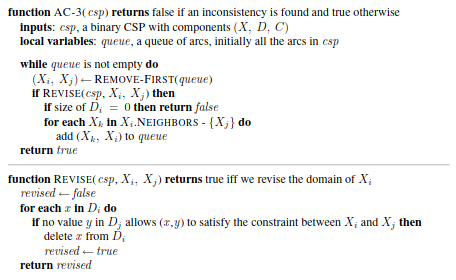
</div>

- Better utilization of constraints
- We can enforce consistency and prune inconsistent values from domains.

## Task

Varibles: $x_1, x_2, x_3, x_4$

Domain for each variable: $D_1 = D_2 = D_3 = D_4 = \{0, 1, 2, 3\}$

Constraints:
- C1: $x_1 < x_2$
- C2: $x_2 < x_3$
- C3: $x_4 = 2x_2$

What are the domains after running AC3 algorithm?



In [ ]:
class CSP_AC3(CSP_MRV):
    '''
    Least Constraining Value + Minimal Remaining Value heuristics
    '''

    def __init__(self,
                 variables: List[V],
                 domains: Dict[V, List[D]],
                 constraints: List[Constraint] = []) -> None:

        self.variables = variables
        self.domains = copy.deepcopy(domains)
        self.constraints = {}
        
        self.steps = 0
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")
        
        # Add constraints if any
        for c in constraints:
            self.add_constraint(c)
        
        # Setting the neighbors
        self.neighbors = {}
        for var, var_constraints in self.constraints.items():
            self.neighbors[var] = set()
            for c in var_constraints: 
                x, y = c.variables
                other_var = x if x!=var else y
                self.neighbors[var].add(other_var)

    def get_all_constraints(self) -> List[Constraint]: 
        '''
        Returns list of all constraints.
        '''
        all_constraints = set() # Use set - every constraint is there two times
        for var, var_constraints in self.constraints.items():
            for c in var_constraints:
                all_constraints.add(c)
        return list(all_constraints)


    def ac3(self, variable: V = None, domains: Dict[V, List[D]] = None): 
        if domains is None:
            domains = {key: value[:] for key, value in self.domains.items()}

        if variable is None:
            worklist = self.get_all_constraints()
        else:
            worklist = self.constraints[variable]
          
        while worklist:
            constraint = worklist.pop(0)
            x, y = constraint.variables
            change, domains = self.arc_reduce(constraint, domains)

            if change:
                if len(domains[x]) == 0:
                    return False, domains
                for z in self.neighbors[x]:
                    if z != y:
                        c = constraint.__class__(z, x)
                        worklist.append(c)
        return True, domains


    def arc_reduce(self, constraint: Constraint, domains: Dict[V, List[D]]) -> Tuple[bool, Dict[V, List[D]]]:
        x, y = constraint.variables
        change = False

        for x_value in domains[x]:
            satisfied = []
            for y_value in domains[y]:
                assignment = {x: x_value, y: y_value}
                satisfied.append(constraint.satisfied(assignment))

            if not any(satisfied): # If all are false
                domains[x].remove(x_value)
                change = True
        return change, domains

    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        if len(assignment) == len(self.variables):
            return assignment

        unassigned = [v for v in self.variables if v not in assignment]
        var = self.select_variable(unassigned)
        values = self.sorted_values(var, assignment)

        for val in values:
            self.steps += 1
            local_assignment = {key: value[:] for key, value in assignment.items()}
            local_assignment[var] = [val]
            local_domains = {key: value[:] for key, value in self.domains.items()}
            local_domains.update(local_assignment)
            
            isconsitent, local_domains = self.ac3(var, local_domains)

            if isconsitent:
                result = self.backtracking_search(local_assignment)
                if result is not None:
                    return result
        return None

## Sudoku


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Sudoku-by-L2G-20050714.svg/1024px-Sudoku-by-L2G-20050714.svg.png"  width="300"/>

- Goal is to fill missing digit in 9x9 grid so that no digit repeats for all:
    - Rows
    - Columns
    - 3x3 subgrids / boxes

**Question:** How to represent variables, domains and contraints?



In [ ]:
#Sudoku constraints
#- Output:
#    - list of tuples, each tuple represents binary constraint between two variables [(variable1, variable2), ...]
#    - variable is tuple of square coordinates: variable = (coord1, coord2)

def parse_board(board: str) -> np.ndarray:
    string = ''.join(board).replace(' ', '').replace('|', '').replace('-', '')
    return np.array(list(string)).astype(int).reshape((9, 9))

def col_constraints() -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
    cols = [[(i, j) for i in range(9)] for j in range(9)]
    constraints = []
    for col in cols: # Col is List[tuple[int, int]]
        constraints = constraints + [(i, j) for i in col for j in col if j != i]
    return constraints

def row_constraints() -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
    rows = [[(j, i) for i in range(9)] for j in range(9)]
    constraints = []
    for row in rows:
        constraints = constraints + [(i, j) for i in row for j in row if j != i]
    return constraints

def box_constraints() -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
    box_start = [(i, j) for i in [0, 3, 6] for j in [0, 3, 6]]
    box_add = [(i, j) for i in range(3) for j in range(3)]

    boxes = []
    for b in box_start:
        box = []
        for a in box_add:
            box.append((b[0] + a[0], b[1] + a[1]))
        boxes.append(box)

    constraints = []
    for box in boxes:
        constraints = constraints + [(i, j) for i in box for j in box if j != i]
    return constraints


First, we run backtracking on empty board to see if it finds anything meaningful.

In [ ]:
board_empty = [
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'-----------------',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'-----------------',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
]
board = parse_board(board_empty)

#Variables
variables = [(i, j) for i in range(9) for j in range(9)]

# Domains - 0 can be anything
domains = {}
for v in variables:
    if board[v] == 0:
        domains[v] = [i+1 for i in range(9)]
    else:
        domains[v] = [board[v]]

# Constraints
rc = row_constraints()
cc = col_constraints()
bc = box_constraints()
constraints = [InequalityConstraint(c1, c2) for c1, c2 in list(set(rc + cc + bc))] 
sudoku_empty = CSPProblem(variables, domains, constraints)

In [ ]:
# Initialize solver
csp = BasicCSP(sudoku_empty.variables, sudoku_empty.domains, sudoku_empty.constraints)
solution = csp.backtracking_search()

# Visualise results
array = np.empty((9, 9))
for key, value in solution.items():
    array[key] = value

print(f'Backtracking steps: {csp.steps}')
print(array)


Results looks nice! Now, lets change some digit.

In [ ]:
board1 = [
'0 0 0|0 0 0|0 0 1',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'-----------------',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'-----------------',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
'0 0 0|0 0 0|0 0 0',
]
board = parse_board(board1)

# Domains - 0 can be anything
domains = {}
for v in variables:
    if board[v] == 0:
        domains[v] = [i+1 for i in range(9)]
    else:
        domains[v] = [board[v]]
        
sudoku1 = CSPProblem(variables, domains, constraints)

In [ ]:
# Initialize solver
csp = BasicCSP(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
solution = csp.backtracking_search()


# Visualise results
array = np.empty((9, 9))
for key, value in solution.items():
    array[key] = value

print(array)
print(f'Backtracking steps: {csp.steps}')

**Question:** Why is it so inefficient? Any ideas how to improve it?

**Answer:**

The algorithm will check lot of assignments before correcting the variable which is causing the failure.

- We need to add minimal remaining value heuristic
- The algorithm needs to first expand variable with least available values in domain so it starts with the 1 digit in corner.

#### Another sudoku example

In [ ]:
board = [
'0 0 0|0 7 9|0 6 5',
'0 0 0|0 0 3|0 0 2',
'0 0 5|0 6 0|0 9 3',
'-----------------',
'3 4 0|0 5 0|1 0 6',
'0 0 0|0 0 0|0 0 0',
'6 0 8|0 2 0|0 5 9',
'-----------------',
'9 5 0|0 1 0|6 0 0',
'7 0 0|6 0 0|0 0 0',
'8 2 0|3 9 0|0 0 0',
]
board = parse_board(board)

# Domains - 0 can be anything
domains = {}
for v in variables:
    if board[v] == 0:
        domains[v] = [i+1 for i in range(9)]
    else:
        domains[v] = [board[v]]
        
sudoku2 = CSPProblem(variables, domains, constraints)

In [ ]:
csp = CSP_MRV(sudoku2.variables, sudoku2.domains, sudoku2.constraints)
solution = csp.backtracking_search()


# Visualise results
array = np.empty((9, 9))
for key, value in solution.items():
    array[key] = value

print(array)
print(f'Backtracking steps: {csp.steps}')

In [ ]:
print('Empty sudoku')
csp = BasicCSP(sudoku_empty.variables, sudoku_empty.domains, sudoku_empty.constraints)
solution = csp.backtracking_search()
print(f'Basic steps:   {csp.steps}')

csp = CSP_MRV(sudoku_empty.variables, sudoku_empty.domains, sudoku_empty.constraints)
solution = csp.backtracking_search()
print(f'MRV steps:     {csp.steps}')

csp = CSP_LCV(sudoku_empty.variables, sudoku_empty.domains, sudoku_empty.constraints)
solution = csp.backtracking_search()
print(f'MRV+LCV steps: {csp.steps}')

In [ ]:
print('Sudoku with 1 in upper right corner')
csp = BasicCSP(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
solution = csp.backtracking_search()
print(f'Basic steps:   {csp.steps}')

csp = CSP_MRV(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
solution = csp.backtracking_search()
print(f'MRV steps:     {csp.steps}')

csp = CSP_LCV(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
solution = csp.backtracking_search()
print(f'MRV+LCV steps: {csp.steps}')

However, overhead added by doing additional checks outweights decrease in backtracking steps.

In [ ]:
%%time
csp = CSP_LCV(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
solution = csp.backtracking_search()
print(f'MRV+LCV steps: {csp.steps}')

In [ ]:
%%time
csp = CSP_MRV(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
solution = csp.backtracking_search()
print(f'MRV steps: {csp.steps}')

## Solving more sudoku

In [ ]:
csp = CSP_MRV(sudoku2.variables, sudoku2.domains, sudoku2.constraints)
csp.backtracking_search()
print(f'Steps            {csp.steps}')

csp = CSP_AC3(sudoku2.variables, sudoku2.domains, sudoku2.constraints)
c, csp.domains = csp.ac3()
csp.backtracking_search()
print(f'Steps after AC3  {csp.steps}')

In [ ]:
csp = CSP_MRV(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
csp.backtracking_search()
print(f'Steps           {csp.steps}')

csp = CSP_AC3(sudoku1.variables, sudoku1.domains, sudoku1.constraints)
c, csp.domains = csp.ac3()
csp.backtracking_search()
print(f'Steps with AC3  {csp.steps}')

Lets try more difficult sudoku (classified as very hard)

In [ ]:
board = [
'6 0 3|0 0 0|1 0 0',
'0 0 9|0 0 0|2 0 0',
'0 0 7|4 0 9|0 0 0',
'-----------------',
'0 0 0|0 1 0|0 0 7',
'4 0 0|0 6 0|0 0 0',
'0 0 0|0 7 0|0 5 3',
'-----------------',
'0 1 0|0 0 0|0 4 0',
'0 0 6|3 0 7|0 9 0',
'0 9 0|0 0 2|0 3 0',
]
board = parse_board(board)

#Variables
variables = [(i, j) for i in range(9) for j in range(9)]

# Domains - 0 can be anything
domains = {}
for v in variables:
    if board[v] == 0:
        domains[v] = [i+1 for i in range(9)]
    else:
        domains[v] = [board[v]]

# Constraints
rc = row_constraints()
cc = col_constraints()
bc = box_constraints()
constraints = [InequalityConstraint(c1, c2) for c1, c2 in list(set(rc + cc + bc))]

sudoku3 = CSPProblem(variables, domains, constraints)

In [ ]:
csp = CSP_MRV(sudoku3.variables, sudoku3.domains, sudoku3.constraints)
solution2 = csp.backtracking_search()
print(f'Steps           {csp.steps}')

csp = CSP_AC3(sudoku3.variables, sudoku3.domains, sudoku3.constraints)
c, csp.domains = csp.ac3()
solution1 = csp.backtracking_search()
print(f'Steps with AC3  {csp.steps}')